<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [27]:
boston_df=pd.read_csv(boston_url)
print(boston_df.head(5))

<class 'pandas.errors.EmptyDataError'>: No columns to parse from file

In [ ]:
#### Add your code below following the instructions given in the course to complete the peer graded assignment

## For the "Median value of owner-occupied homes" provide a boxplot

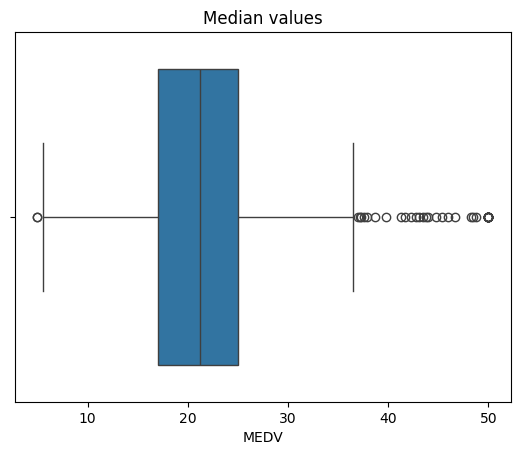

In [24]:
bxplt = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Median values')
pyplot.show()

## Provide a  bar plot for the Charles river variable

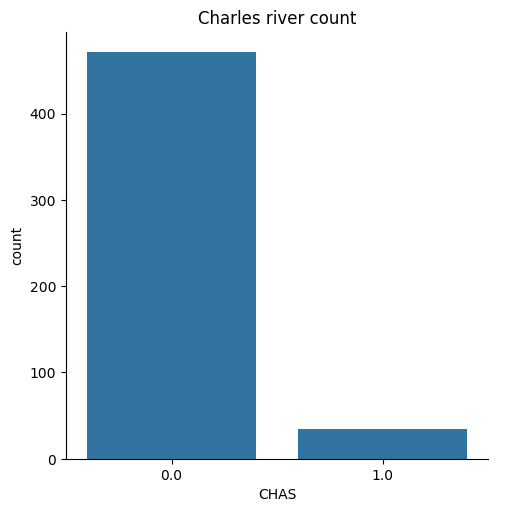

In [15]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Charles river count')
pyplot.show()

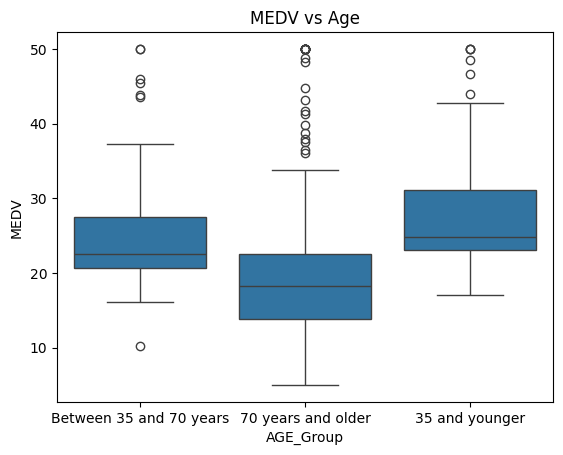

In [19]:
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[boston_df['AGE'] <= 35, 'AGE_Group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_Group'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_Group'] = '70 years and older'

sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('MEDV vs Age')
pyplot.show()


## Provide a boxplot for the MEDV variable vs the AGE variable

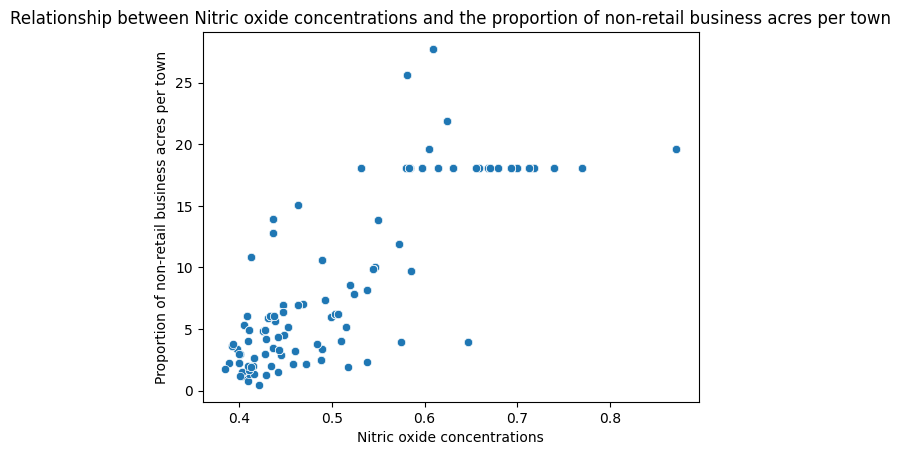

In [22]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of 
#non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.xlabel("Nitric oxide concentrations")
pyplot.ylabel("Proportion of non-retail business acres per town")
pyplot.show()

## Create a histogram for the pupil to teacher ratio variable

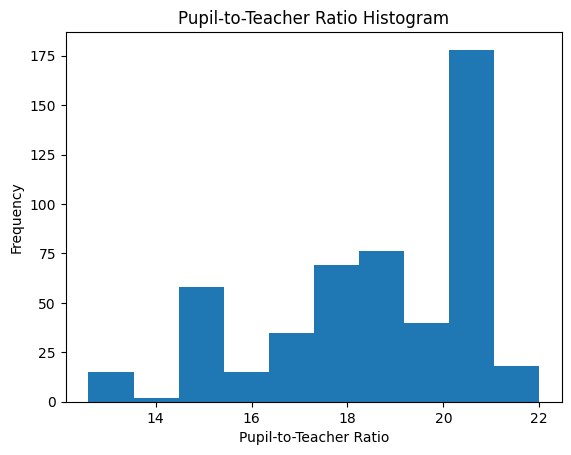

In [23]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.title('Pupil-to-Teacher Ratio Histogram')
pyplot.show()

## Is there a significant difference in median value of houses bounded by the Charles river or not?

In [34]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### We can reject the null hypothesis, because p-value is under 0.05, there is significant difference

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [51]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_Group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_Group'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_Group'] = '70 years and older'

MEDV1 = boston_df[boston_df['AGE_Group'] == '35 and younger']['MEDV'] 
MEDV2 = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
MEDV3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

f_value, p_value = scipy.stats.f_oneway(MEDV1, MEDV2, MEDV3)
f_value, p_value


(36.40764999196599, 1.7105011022702984e-15)

#### p-value is under 0.05, we can reject null hypothesis

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### We can reject null hypothesis because p-value is under 0.05. Also we can see a positive relation between nitric oxide concentrations and proportion of non-retail business acres per town (0.76)

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [54]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        22:15:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Based on p-value under 0.05, we can conclude there is a significant difference. Additionally, in model summary we can observe the positive impat of DIS variable on MEDV